In [22]:
%matplotlib inline
import warnings
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras import backend as K

In [23]:
num_classes = 10
train = np.genfromtxt('/Users/krishna/MIRI/MVA/ZIP data/zip_train.dat')
test = np.genfromtxt('/Users/krishna/MIRI/MVA/ZIP data/zip_test.dat')

In [24]:
X = train[:,1:]
Y = train[:,0]
Y = to_categorical(Y)

True Value 6.0


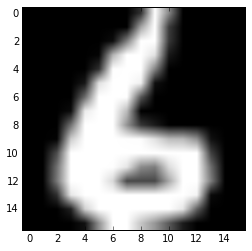

In [25]:
IMG_INDEX = 19
X_test = test[:,1:]
img_plt = X_test[IMG_INDEX,:].reshape((16,16))
plt.imshow(img_plt, cmap='gray')
print "True Value",test[IMG_INDEX,0] 

In [26]:
sgd = SGD(momentum=0.9, decay=1e-4)
model = Sequential()
model.add(Dense(output_dim=400, input_dim=256))
model.add(Activation('sigmoid'))
model.add(Dense(output_dim=10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

In [27]:
model.fit(X,Y, nb_epoch=5, batch_size=120)

Epoch 1/5
7291/7291 [==============================] - 0s - loss: 1.4295 - acc: 0.6121     
Epoch 2/5
7291/7291 [==============================] - 0s - loss: 0.6277 - acc: 0.8759     
Epoch 3/5
7291/7291 [==============================] - 0s - loss: 0.4395 - acc: 0.8985     
Epoch 4/5
7291/7291 [==============================] - 0s - loss: 0.3600 - acc: 0.9132     
Epoch 5/5
7291/7291 [==============================] - 0s - loss: 0.3158 - acc: 0.9236     


In [28]:
X_test = test[:,1:]
Y_test = test[:,0]
Y_test = to_categorical(Y_test)

In [29]:
y_pred = model.predict_classes(X_test)
loss_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print "Loss", loss_metrics[0], "Accuracy", loss_metrics[1]

2007/2007 [==============================] - 0s     
Loss 0.417616549837 Accuracy 0.884902840179


In [30]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
cm = confusion_matrix(test[:,0], y_pred)
error = 1.0 * sum(np.extract(1 -  np.eye(10), cm))/sum(sum(cm))
print "Error ", error
print cm

Error  0.11509715994
[[344   0   1   1   3   0   4   1   4   1]
 [  0 252   0   2   4   0   4   0   1   1]
 [  6   0 154   5  11   2   4   3  13   0]
 [  4   0   4 140   1  15   0   0   0   2]
 [  1   2   7   0 170   1   6   3   2   8]
 [  7   0   0   9   3 133   0   0   4   4]
 [  2   0   3   0   3   4 157   0   1   0]
 [  1   1   3   0   5   1   0 131   1   4]
 [  3   2   1   8   2   8   0   2 138   2]
 [  0   3   1   0   6   1   0   8   1 157]]


In [32]:
print "F1 score :",f1_score(test[:,0], y_pred, average='macro')
print "Accuracy :",accuracy_score(test[:,0], y_pred)

F1 score : 0.874800010602
Accuracy : 0.88490284006
